### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [2]:
import numpy as np
import pandas as pd

In [23]:
import pandas as pd

sheet_id = "17PQ5EaYYjBLodjaquFd5sW-7Dijkpf2BRdeIwmxF56w"
sheet_name = "Sheet1"  # Replace with actual sheet name
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(csv_url)
df.head()
df.shape

(214, 10)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix
from sklearn.model_selection import  train_test_split

In [9]:
X = df.drop(columns='Type')
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [10]:
y = df['Type']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
# to know the value of k
k = np.sqrt(X_train.shape[0])
k

np.float64(13.076696830622021)

In [16]:
X_train.shape[0]

171

In [19]:
knn = KNeighborsClassifier(n_neighbors=int(k))
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [20]:
y_pred = knn.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.6511627906976745

In [21]:
confusion_matrix(y_test,y_pred)

array([[10,  1,  0,  0,  0,  0],
       [ 5,  9,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  3,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  8]])

In [25]:
# now check different values
def knn_func(X_train, y_train, X_test, k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  return y_pred

In [27]:
import matplotlib.pyplot as plt

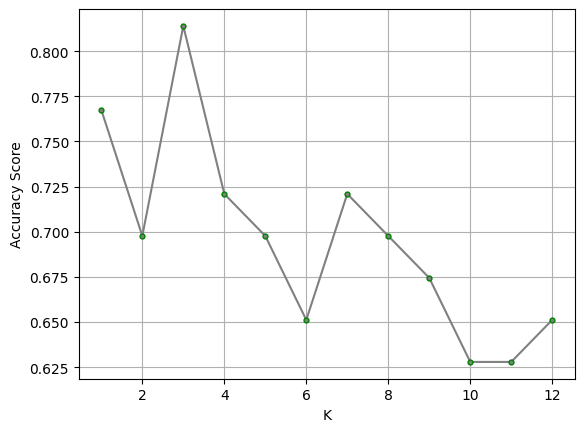

In [31]:
accuracy = []
k_values = range(1,int(k))
for i in k_values:
  y_pred = knn_func(X_train,y_train,X_test,i)
  accur = accuracy_score(y_test,y_pred)
  accuracy.append(accur)

plt.plot(k_values,accuracy,c='grey',marker='.',ms=7,mfc='grey',mec='green')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

* From above graph of Accuracy vs K, best value for **n_beighbours is 3**.

In [28]:
X_train.shape

(171, 9)